In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('IMDB-Movie-Data.csv')
data.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
data.shape
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
print(data.isnull().sum())
data = data.dropna()


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


In [6]:
top5 = data.sort_values(by='Rating', ascending=False).head(5)
print(top5[['Title','Genre','Rating']])


                Title                    Genre  Rating
54    The Dark Knight       Action,Crime,Drama     9.0
80          Inception  Action,Adventure,Sci-Fi     8.8
36       Interstellar   Adventure,Drama,Sci-Fi     8.6
96      Kimi no na wa  Animation,Drama,Fantasy     8.6
249  The Intouchables   Biography,Comedy,Drama     8.6


In [7]:
comedy_movies = data[data['Genre'].str.contains('Comedy')]
top10_comedy = comedy_movies.sort_values(by='Rating', ascending=False).head(10)
print(top10_comedy[['Title','Genre','Rating']])


                        Title                       Genre  Rating
249          The Intouchables      Biography,Comedy,Drama     8.6
430                  3 Idiots                Comedy,Drama     8.4
499                        Up  Animation,Adventure,Comedy     8.3
6                  La La Land          Comedy,Drama,Music     8.3
688               Toy Story 3  Animation,Adventure,Comedy     8.3
241                Inside Out  Animation,Adventure,Comedy     8.2
765                        PK        Comedy,Drama,Romance     8.2
82    The Wolf of Wall Street      Biography,Comedy,Crime     8.2
74                   Zootopia  Animation,Adventure,Comedy     8.1
238  The Grand Budapest Hotel      Adventure,Comedy,Drama     8.1


In [8]:
best_directors = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
print(best_directors)


Director
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Damien Chazelle                     8.40
Thomas Vinterberg                   8.30
Rajkumar Hirani                     8.30
Lee Unkrich                         8.30
Pete Docter                         8.25
Name: Rating, dtype: float64


In [9]:
genre_count = data['Genre'].value_counts().head(10)
print(genre_count)


Genre
Action,Adventure,Sci-Fi       50
Comedy,Drama,Romance          30
Drama                         29
Drama,Romance                 27
Animation,Adventure,Comedy    26
Comedy                        26
Action,Adventure,Fantasy      25
Comedy,Drama                  24
Comedy,Romance                22
Crime,Drama,Thriller          18
Name: count, dtype: int64


In [10]:
year_movies = data['Year'].value_counts().sort_index()
print(year_movies)


Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: count, dtype: int64


In [11]:
top_revenue = data.sort_values(by='Revenue (Millions)', ascending=False).head(10)
print(top_revenue[['Title','Revenue (Millions)']])


                                          Title  Revenue (Millions)
50   Star Wars: Episode VII - The Force Awakens              936.63
87                                       Avatar              760.51
85                               Jurassic World              652.18
76                                 The Avengers              623.28
54                              The Dark Knight              533.32
12                                    Rogue One              532.17
119                                Finding Dory              486.29
94                      Avengers: Age of Ultron              458.99
124                       The Dark Knight Rises              448.13
578             The Hunger Games: Catching Fire              424.65


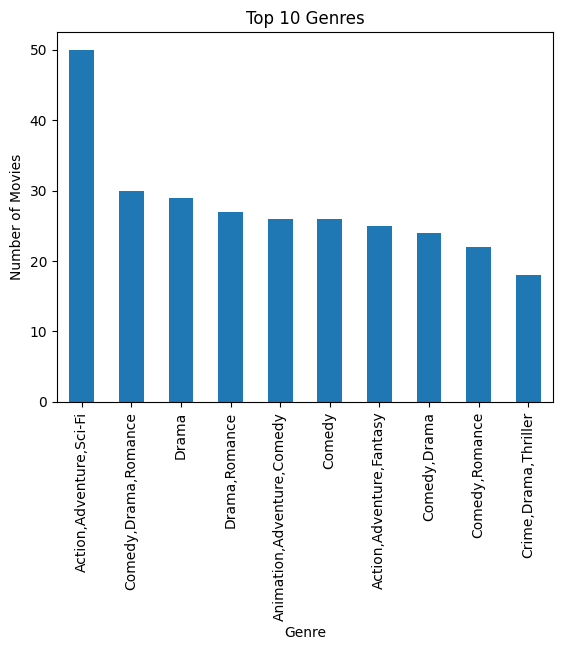

In [12]:
plt.figure()
genre_count.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


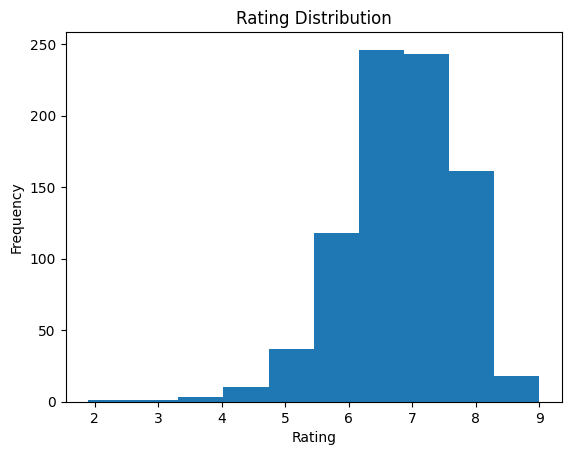

In [13]:
plt.figure()
data['Rating'].plot(kind='hist')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.show()


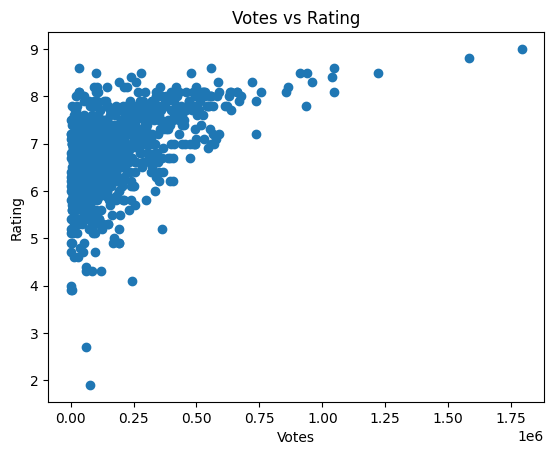

In [14]:
plt.figure()
plt.scatter(data['Votes'], data['Rating'])
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()
